In [1]:
%matplotlib inline
import numpy as np
from scipy import integrate
from scipy.special import gamma
from scipy.optimize import fsolve, basinhopping
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from scipy import signal
import scipy.io
import gc
import matplotlib.colors as colors
import nbimporter
from _create_pdf import create_spins;
from _helper_functions import tsallis, cauchy, find_nearest, odeintz, find_nearest_sorted_left
from _steady_state import a_steady
from _mbes import mbes, mbes_soc
from _do_calculation import do_calculation, do_calculation_soc, do_calculation_soc_pump_only
#%qtconsole

In [2]:
gcoll = 4.22612602e+01#*9.5*np.pi #HWHM
q = 1.39
quali = 842
fr = 3.4892e3;
kappa = np.pi*fr/quali #HWHM Kappatotal
qualiout = 44000
qualiint = 902

kappaout = np.pi*fr/qualiout
kappaint = np.pi*fr/qualiint
kappain = kappa-kappaint-kappaout
delta = 0*2*np.pi
deltac = 0*2*np.pi
gperp = 2*np.pi*0.09 #HWHM
gpar = 2*np.pi*.001#0.001 #HWHM
gammaq = 2*np.pi*9.4 #FWHM
nbins = 701#701#5000#20
#g0 = gcoll/sqrt(nspins)
print(kappa, kappain, kappaout, kappaint)
#%qtconsole

13.018580863308202 0.6168526912604534 0.2491282974296706 12.152599874618078


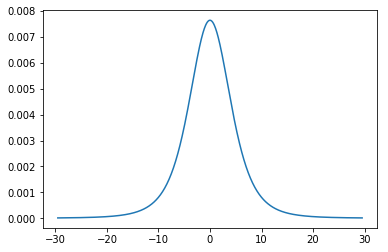

In [6]:
spins, gs, pdf = create_spins(gcoll, q, delta, gammaq, nbins, holes=False, inhomo=True, hyperfine=True)
plt.plot(spins, pdf/max(pdf))

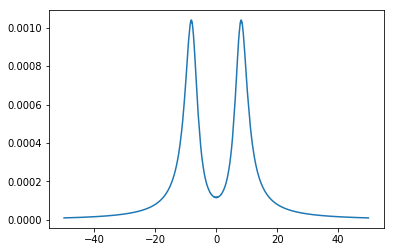

In [8]:
initsteady = (0.1,0.1)
fstart = 50
deltaarr = np.linspace(-fstart*2*np.pi,fstart*2*np.pi, 2000)
etasteady = 0.00001
losasteady = np.zeros(np.shape(deltaarr))
losareal = np.zeros(np.shape(deltaarr))
losaimag = np.zeros(np.shape(deltaarr))

newinit = initsteady
for i, delt in enumerate(deltaarr):
    ar, ai = a_steady(etasteady, delt, gs, spins, gpar, gperp, kappa, newinit)
    newinit = (ar, ai)
    losasteady[i] = ai**2+ar**2
    losareal[i] = ar
    losaimag[i] = ai

fig = plt.figure()
plt.plot(deltaarr/2/np.pi, (losasteady/0.0000000001))
#deltaarr[find(losasteady == max(losasteady))]/2/pi

In [11]:
pumptime = 200e-3
decaytime = 300e-3
dt = 0.5e-3
numsteps = int(pumptime/dt)
tlist = np.arange(0,pumptime+dt,dt)
tlistdecay = np.arange(0, decaytime+dt, dt)

# test time it takes to calculate


init = np.ones(nbins*2+1)*(-1)
init[0] = 0
init[1::2] = 0

pulsei = np.ones((len(tlist)))

pin = np.arange(-45, 0,1)
aref = 2*np.pi*50

kappaindummy = linspace(np.pi*fr/20, np.pi*fr/100000, 100)
qualisin = np.pi*fr/kappaindummy

alosqu = np.zeros((len(qualisin), len(pin), len(tlist)+len(tlistdecay)))
szlosqu = np.zeros(np.shape(alosqu))

for i, qualiin in enumerate(qualisin):
    kappain = np.pi*fr/qualiin
    kappa = kappain + kappaint + kappaout
    print(i, np.pi*fr/kappa)
    for ctr, p in enumerate(pin):
        dr = aref*10**(p/20.)
        asolpump, asoldecay, infodict = do_calculation(dr, tlist, tlistdecay, init)
        alosqu[i, ctr, : ] = np.hstack((abs(asolpump[:,0])**2, abs(asoldecay[:,0])**2))
        szlosqu[i, ctr, :] = np.hstack((np.real(np.sum(asolpump[:, 2::2], axis=1)), np.real(np.sum(asoldecay[:, 2::2], axis=1))))

0 19.5574636008
1 19.7525303337
2 19.9515274715
3 20.154575014
4 20.3617978961
5 20.5733262441
6 20.7892956485
7 21.0098474537
8 21.2351290663
9 21.4652942839
10 21.7005036452
11 21.9409248032
12 22.186732924
13 22.4381111124
14 22.6952508664
15 22.9583525643
16 23.227625985
17 23.5032908661
18 23.7855775017
19 24.0747273844
20 24.370993894
21 24.6746430383
22 24.9859542495
23 25.3052212421
24 25.6327529368
25 25.9688744582
26 26.3139282105
27 26.6682750416
28 27.0322955014
29 27.4063912055
30 27.790986313
31 28.1865291307
32 28.5934938566
33 29.0123824763
34 29.4437268287
35 29.8880908586
36 30.3460730768
37 30.8183092494
38 31.3054753423
39 31.8082907499
40 32.3275218394
41 32.8639858485
42 33.4185551773
43 33.9921621226
44 34.585804108
45 35.200549472
46 35.8375438842
47 36.4980174716
48 37.1832927468
49 37.8947934477
50 38.6340544103
51 39.4027326217
52 40.2026196181
53 41.035655425
54 41.9039442668
55 42.809772314
56 43.7556277833
57 44.7442237621
58 45.7785241992
59 46.8617735848

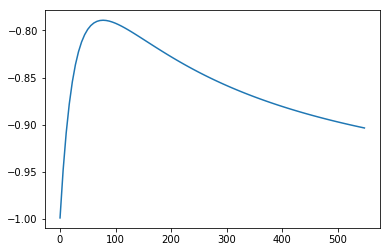

In [12]:
prefidx = 15

plot(kappaindummy, szlosqu[:,prefidx,401])
maxkappaidx = int(np.where(szlosqu[:,prefidx,401] == max(szlosqu[:,prefidx,401]))[0])

In [13]:
refcurve = szlosqu[maxkappaidx,:(prefidx+1),401]
for i, qu in enumerate(qualisin):
    pidx, pval = find_nearest(refcurve, szlosqu[i, prefidx,401])

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
14
14
13
13
11
9
0
